* Data Set

In [1]:
from keras.datasets import reuters
(x_train, y_train), (x_test, y_test) = reuters.load_data(num_words=15000)

Using TensorFlow backend.


In [2]:
x_val = x_train[7000:]
y_val = y_train[7000:]
x_train = x_train[:7000]
y_train = y_train[:7000]

In [3]:
from keras.preprocessing import sequence

x_train = sequence.pad_sequences(x_train, maxlen=120)
x_val = sequence.pad_sequences(x_val, maxlen=120)
x_test = sequence.pad_sequences(x_test, maxlen=120)

### 다층퍼셉트론 신경망 모델

Train on 7000 samples, validate on 1982 samples
Epoch 1/10
7000/7000 [==============================] - 2s 348us/step - loss: 1.9282 - acc: 0.5293 - val_loss: 1.4434 - val_acc: 0.6620
Epoch 2/10
7000/7000 [==============================] - 1s 125us/step - loss: 0.8415 - acc: 0.8094 - val_loss: 1.2950 - val_acc: 0.7033
Epoch 3/10
7000/7000 [==============================] - 1s 126us/step - loss: 0.2823 - acc: 0.9506 - val_loss: 1.3359 - val_acc: 0.7003
Epoch 4/10
7000/7000 [==============================] - 1s 124us/step - loss: 0.1887 - acc: 0.9606 - val_loss: 1.3617 - val_acc: 0.6948
Epoch 5/10
7000/7000 [==============================] - 1s 125us/step - loss: 0.1513 - acc: 0.9620 - val_loss: 1.3310 - val_acc: 0.7008
Epoch 6/10
7000/7000 [==============================] - 1s 123us/step - loss: 0.1360 - acc: 0.9617 - val_loss: 1.3416 - val_acc: 0.7028
Epoch 7/10
7000/7000 [==============================] - 1s 123us/step - loss: 0.1234 - acc: 0.9619 - val_loss: 1.4071 - val_acc: 0.6902


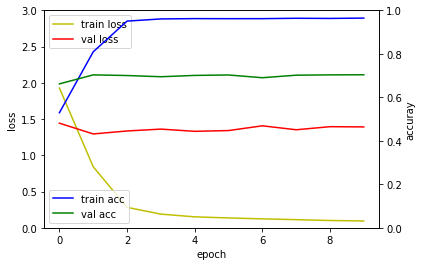

2246/2246 [==============================] - 0s 20us/step
## evaluation loss and_metrics ##
[1.4161921831930946, 0.6976847729296527]


In [4]:
# 0. 사용할 패키지 불러오기
from keras.datasets import reuters
from keras.utils import np_utils
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding
from keras.layers import Flatten

max_features = 15000
text_max_words = 120

# 1. 데이터셋 생성하기

# 훈련셋과 시험셋 불러오기
(x_train, y_train), (x_test, y_test) = reuters.load_data(num_words=max_features)

# 훈련셋과 검증셋 분리
x_val = x_train[7000:]
y_val = y_train[7000:]
x_train = x_train[:7000]
y_train = y_train[:7000]

# 데이터셋 전처리 : 문장 길이 맞추기
x_train = sequence.pad_sequences(x_train, maxlen=text_max_words)
x_val = sequence.pad_sequences(x_val, maxlen=text_max_words)
x_test = sequence.pad_sequences(x_test, maxlen=text_max_words)

# one-hot 인코딩
y_train = np_utils.to_categorical(y_train)
y_val = np_utils.to_categorical(y_val)
y_test = np_utils.to_categorical(y_test)

# 2. 모델 구성하기
model = Sequential()
model.add(Embedding(max_features, 128, input_length=text_max_words))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(46, activation='softmax'))

# 3. 모델 학습과정 설정하기
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# 4. 모델 학습시키기
hist = model.fit(x_train, y_train, epochs=10, batch_size=64, validation_data=(x_val, y_val))

# 5. 학습과정 살펴보기
%matplotlib inline
import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots()

acc_ax = loss_ax.twinx()

loss_ax.plot(hist.history['loss'], 'y', label='train loss')
loss_ax.plot(hist.history['val_loss'], 'r', label='val loss')
loss_ax.set_ylim([0.0, 3.0])

acc_ax.plot(hist.history['acc'], 'b', label='train acc')
acc_ax.plot(hist.history['val_acc'], 'g', label='val acc')
acc_ax.set_ylim([0.0, 1.0])

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuray')

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')

plt.show()

# 6. 모델 평가하기
loss_and_metrics = model.evaluate(x_test, y_test, batch_size=64)
print('## evaluation loss and_metrics ##')
print(loss_and_metrics)

### 순환 신경망 모델

Train on 7000 samples, validate on 1982 samples
Epoch 1/10
7000/7000 [==============================] - 15s 2ms/step - loss: 2.4979 - acc: 0.3870 - val_loss: 2.0377 - val_acc: 0.4945
Epoch 2/10
7000/7000 [==============================] - 14s 2ms/step - loss: 1.9168 - acc: 0.5099 - val_loss: 1.7049 - val_acc: 0.5555
Epoch 3/10
7000/7000 [==============================] - 15s 2ms/step - loss: 1.6865 - acc: 0.5649 - val_loss: 1.6549 - val_acc: 0.5686
Epoch 4/10
7000/7000 [==============================] - 14s 2ms/step - loss: 1.5254 - acc: 0.6087 - val_loss: 1.5948 - val_acc: 0.5827
Epoch 5/10
7000/7000 [==============================] - 15s 2ms/step - loss: 1.3805 - acc: 0.6407 - val_loss: 1.4732 - val_acc: 0.6236
Epoch 6/10
7000/7000 [==============================] - 14s 2ms/step - loss: 1.1067 - acc: 0.7129 - val_loss: 1.3618 - val_acc: 0.6776
Epoch 7/10
7000/7000 [==============================] - 15s 2ms/step - loss: 0.8780 - acc: 0.7714 - val_loss: 1.3689 - val_acc: 0.6781
Epoch 8

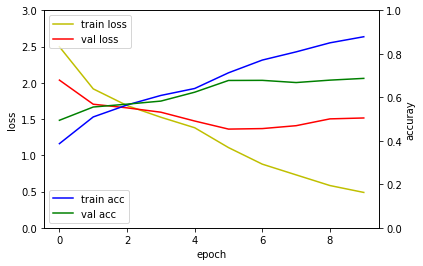

2246/2246 [==============================] - 1s 394us/step
## evaluation loss and_metrics ##
[1.6265962635526037, 0.660284951077119]


In [5]:
# 0. 사용할 패키지 불러오기
from keras.datasets import reuters
from keras.utils import np_utils
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM
from keras.layers import Flatten

max_features = 15000
text_max_words = 120

# 1. 데이터셋 생성하기

# 훈련셋과 시험셋 불러오기
(x_train, y_train), (x_test, y_test) = reuters.load_data(num_words=max_features)

# 훈련셋과 검증셋 분리
x_val = x_train[7000:]
y_val = y_train[7000:]
x_train = x_train[:7000]
y_train = y_train[:7000]

# 데이터셋 전처리 : 문장 길이 맞추기
x_train = sequence.pad_sequences(x_train, maxlen=text_max_words)
x_val = sequence.pad_sequences(x_val, maxlen=text_max_words)
x_test = sequence.pad_sequences(x_test, maxlen=text_max_words)

# one-hot 인코딩
y_train = np_utils.to_categorical(y_train)
y_val = np_utils.to_categorical(y_val)
y_test = np_utils.to_categorical(y_test)

# 2. 모델 구성하기
model = Sequential()
model.add(Embedding(max_features, 128))
model.add(LSTM(128))
model.add(Dense(46, activation='softmax'))

# 3. 모델 학습과정 설정하기
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# 4. 모델 학습시키기
hist = model.fit(x_train, y_train, epochs=10, batch_size=64, validation_data=(x_val, y_val))

# 5. 학습과정 살펴보기
%matplotlib inline
import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots()

acc_ax = loss_ax.twinx()

loss_ax.plot(hist.history['loss'], 'y', label='train loss')
loss_ax.plot(hist.history['val_loss'], 'r', label='val loss')
loss_ax.set_ylim([0.0, 3.0])

acc_ax.plot(hist.history['acc'], 'b', label='train acc')
acc_ax.plot(hist.history['val_acc'], 'g', label='val acc')
acc_ax.set_ylim([0.0, 1.0])

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuray')

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')

plt.show()

# 6. 모델 평가하기
loss_and_metrics = model.evaluate(x_test, y_test, batch_size=64)
print('## evaluation loss and_metrics ##')
print(loss_and_metrics)

### 컨볼루션 신경망 모델

Train on 7000 samples, validate on 1982 samples
Epoch 1/10
7000/7000 [==============================] - 2s 277us/step - loss: 2.2766 - acc: 0.4520 - val_loss: 1.7543 - val_acc: 0.5283
Epoch 2/10
7000/7000 [==============================] - 1s 108us/step - loss: 1.5765 - acc: 0.6219 - val_loss: 1.3442 - val_acc: 0.6887
Epoch 3/10
7000/7000 [==============================] - 1s 108us/step - loss: 1.2354 - acc: 0.7054 - val_loss: 1.1898 - val_acc: 0.7185
Epoch 4/10
7000/7000 [==============================] - 1s 108us/step - loss: 0.9891 - acc: 0.7596 - val_loss: 1.0822 - val_acc: 0.7513
Epoch 5/10
7000/7000 [==============================] - 1s 108us/step - loss: 0.7674 - acc: 0.8127 - val_loss: 1.0440 - val_acc: 0.7563
Epoch 6/10
7000/7000 [==============================] - 1s 109us/step - loss: 0.5894 - acc: 0.8493 - val_loss: 1.0299 - val_acc: 0.7624
Epoch 7/10
7000/7000 [==============================] - 1s 109us/step - loss: 0.4491 - acc: 0.8856 - val_loss: 1.0944 - val_acc: 0.7568


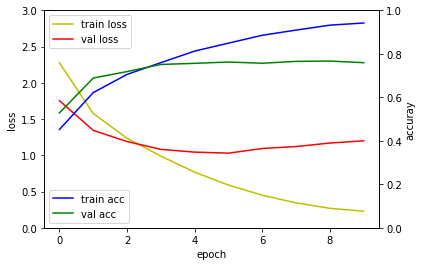

2246/2246 [==============================] - 0s 23us/step
## evaluation loss and_metrics ##
[1.2465435719766047, 0.7595725734639359]


In [6]:
# 0. 사용할 패키지 불러오기
from keras.datasets import reuters
from keras.utils import np_utils
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM
from keras.layers import Flatten, Dropout
from keras.layers import Conv1D, GlobalMaxPooling1D

max_features = 15000
text_max_words = 120

# 1. 데이터셋 생성하기

# 훈련셋과 시험셋 불러오기
(x_train, y_train), (x_test, y_test) = reuters.load_data(num_words=max_features)

# 훈련셋과 검증셋 분리
x_val = x_train[7000:]
y_val = y_train[7000:]
x_train = x_train[:7000]
y_train = y_train[:7000]

# 데이터셋 전처리 : 문장 길이 맞추기
x_train = sequence.pad_sequences(x_train, maxlen=text_max_words)
x_val = sequence.pad_sequences(x_val, maxlen=text_max_words)
x_test = sequence.pad_sequences(x_test, maxlen=text_max_words)

# one-hot 인코딩
y_train = np_utils.to_categorical(y_train)
y_val = np_utils.to_categorical(y_val)
y_test = np_utils.to_categorical(y_test)

# 2. 모델 구성하기
model = Sequential()
model.add(Embedding(max_features, 128, input_length=text_max_words))
model.add(Dropout(0.2))
model.add(Conv1D(256,
                 3,
                 padding='valid',
                 activation='relu',
                 strides=1))
model.add(GlobalMaxPooling1D())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(46, activation='softmax'))

# 3. 모델 학습과정 설정하기
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# 4. 모델 학습시키기
hist = model.fit(x_train, y_train, epochs=10, batch_size=64, validation_data=(x_val, y_val))

# 5. 학습과정 살펴보기
%matplotlib inline
import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots()

acc_ax = loss_ax.twinx()

loss_ax.plot(hist.history['loss'], 'y', label='train loss')
loss_ax.plot(hist.history['val_loss'], 'r', label='val loss')
loss_ax.set_ylim([0.0, 3.0])

acc_ax.plot(hist.history['acc'], 'b', label='train acc')
acc_ax.plot(hist.history['val_acc'], 'g', label='val acc')
acc_ax.set_ylim([0.0, 1.0])

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuray')

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')

plt.show()

# 6. 모델 평가하기
loss_and_metrics = model.evaluate(x_test, y_test, batch_size=64)
print('## evaluation loss and_metrics ##')
print(loss_and_metrics)

### 순환 컨볼루션 신경망 모델

Train on 7000 samples, validate on 1982 samples
Epoch 1/10
7000/7000 [==============================] - 6s 874us/step - loss: 2.1643 - acc: 0.4443 - val_loss: 1.7052 - val_acc: 0.5414
Epoch 2/10
7000/7000 [==============================] - 5s 739us/step - loss: 1.6025 - acc: 0.5841 - val_loss: 1.4873 - val_acc: 0.6186
Epoch 3/10
7000/7000 [==============================] - 5s 742us/step - loss: 1.3128 - acc: 0.6637 - val_loss: 1.3432 - val_acc: 0.6655
Epoch 4/10
7000/7000 [==============================] - 5s 741us/step - loss: 1.0514 - acc: 0.7371 - val_loss: 1.2735 - val_acc: 0.6831
Epoch 5/10
7000/7000 [==============================] - 5s 743us/step - loss: 0.8299 - acc: 0.7913 - val_loss: 1.2642 - val_acc: 0.7008
Epoch 6/10
7000/7000 [==============================] - 5s 744us/step - loss: 0.6721 - acc: 0.8267 - val_loss: 1.2987 - val_acc: 0.7109
Epoch 7/10
7000/7000 [==============================] - 5s 743us/step - loss: 0.5601 - acc: 0.8580 - val_loss: 1.3486 - val_acc: 0.7028


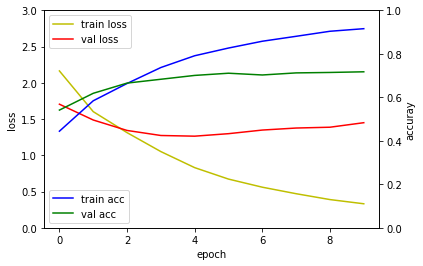

2246/2246 [==============================] - 1s 240us/step
## evaluation loss and_metrics ##
[1.4898979060902515, 0.692787177203918]


In [7]:
# 0. 사용할 패키지 불러오기
from keras.datasets import reuters
from keras.utils import np_utils
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM
from keras.layers import Flatten, Dropout
from keras.layers import Conv1D, MaxPooling1D

max_features = 15000
text_max_words = 120

# 1. 데이터셋 생성하기

# 훈련셋과 시험셋 불러오기
(x_train, y_train), (x_test, y_test) = reuters.load_data(num_words=max_features)

# 훈련셋과 검증셋 분리
x_val = x_train[7000:]
y_val = y_train[7000:]
x_train = x_train[:7000]
y_train = y_train[:7000]

# 데이터셋 전처리 : 문장 길이 맞추기
x_train = sequence.pad_sequences(x_train, maxlen=text_max_words)
x_val = sequence.pad_sequences(x_val, maxlen=text_max_words)
x_test = sequence.pad_sequences(x_test, maxlen=text_max_words)

# one-hot 인코딩
y_train = np_utils.to_categorical(y_train)
y_val = np_utils.to_categorical(y_val)
y_test = np_utils.to_categorical(y_test)

# 2. 모델 구성하기
model = Sequential()
model.add(Embedding(max_features, 128, input_length=text_max_words))
model.add(Dropout(0.2))
model.add(Conv1D(256,
                 3,
                 padding='valid',
                 activation='relu',
                 strides=1))
model.add(MaxPooling1D(pool_size=4))
model.add(LSTM(128))
model.add(Dense(46, activation='softmax'))

# 3. 모델 학습과정 설정하기
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# 4. 모델 학습시키기
hist = model.fit(x_train, y_train, epochs=10, batch_size=64, validation_data=(x_val, y_val))

# 5. 학습과정 살펴보기
%matplotlib inline
import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots()

acc_ax = loss_ax.twinx()

loss_ax.plot(hist.history['loss'], 'y', label='train loss')
loss_ax.plot(hist.history['val_loss'], 'r', label='val loss')
loss_ax.set_ylim([0.0, 3.0])

acc_ax.plot(hist.history['acc'], 'b', label='train acc')
acc_ax.plot(hist.history['val_acc'], 'g', label='val acc')
acc_ax.set_ylim([0.0, 1.0])

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuray')

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')

plt.show()

# 6. 모델 평가하기
loss_and_metrics = model.evaluate(x_test, y_test, batch_size=64)
print('## evaluation loss and_metrics ##')
print(loss_and_metrics)